In [1]:
import pandas as pd

In [2]:
matches = pd.read_csv("../data/matches.csv")

In [3]:
matches

,outdoor,player1_bet_odds,player2_bet_odds,tournament_level,player1_right_handed,player1_age,player2_right_handed,player2_age,best_of,player1_rank,...,player2_total_wins_tournament_history,player2_total_losses_tournament_history,temperature_2m,relative_humidity_2m,windspeed_10m,apparent_temperature,Surface_Clay,Surface_Grass,Surface_Hard,target
0,1,1.39,2.96,0,1,28.0,1,18.8,1,44.0,...,0.0,0.0,27.0,77,9.6,30.9,0,0,1,0
1,1,2.17,1.68,0,1,29.1,1,25.3,1,38.0,...,0.0,0.0,28.9,68,15.2,31.8,0,0,1,1
2,1,2.20,1.66,0,0,32.6,1,21.4,1,66.0,...,0.0,0.0,19.7,52,8.8,18.3,0,0,1,1
3,1,3.99,1.24,0,1,25.3,1,25.8,1,95.0,...,0.0,0.0,24.2,83,6.9,27.6,0,0,1,0
4,1,3.19,1.34,0,1,24.9,0,24.4,1,198.0,...,0.0,0.0,16.2,56,10.9,13.9,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14106,0,2.29,1.62,0,1,24.9,0,35.3,1,80.0,...,5.0,4.0,6.6,88,13.7,3.3,0,0,1,0
14107,0,1.21,4.31,0,0,25.3,1,36.4,1,23.0,...,3.0,0.0,16.1,49,4.6,14.3,0,0,1,1
14108,0,1.46,2.69,0,1,22.9,1,32.6,1,63.0,...,4.0,2.0,16.1,49,4.6,14.3,0,0,1,1
14109,0,3.19,1.35,0,1,22.9,0,25.3,1,63.0,...,4.0,4.0,13.0,57,4.5,11.0,0,0,1,0


## Feature analysis

In [6]:
import pandas as pd

# Calculate correlation excluding 'target'
correlation = matches.drop(columns=['player1_bet_odds', 'player2_bet_odds', 'target']).corrwith(matches['target']).sort_values(ascending=False)

# Display features with strong correlation
print("Top Correlated Features with Target:")
print(correlation)


Top Correlated Features with Target:
player1_blended_elo        0.218652
player1_elo                0.215298
player1_surface_elo        0.207297
player1_is_seeded          0.186483
player1_win_pct_last_10    0.139694
                             ...   
player1_rank              -0.142177
player2_is_seeded         -0.188826
player2_surface_elo       -0.202280
player2_elo               -0.211795
player2_blended_elo       -0.214196
Length: 80, dtype: float64


### Sigma wynik elo

### Pomysł na usuwanie zkorelowanych kolumn: przyniósł gorsze wyniki

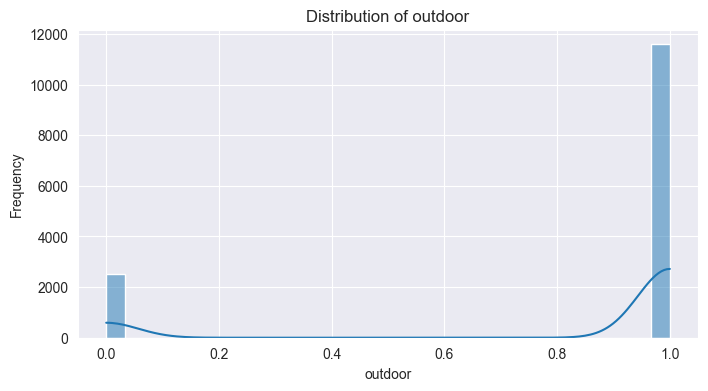

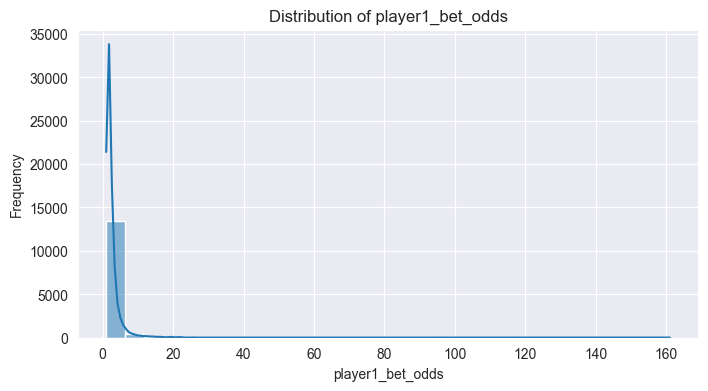

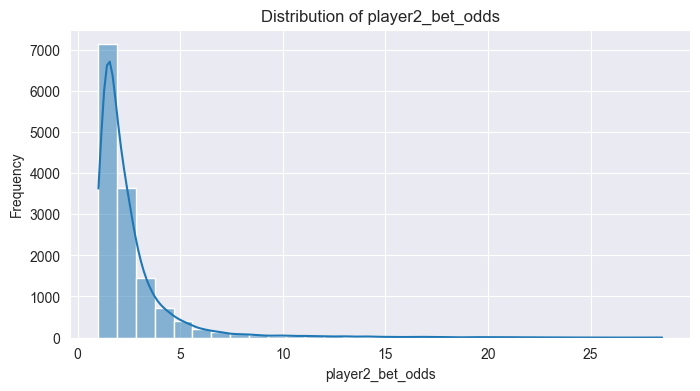

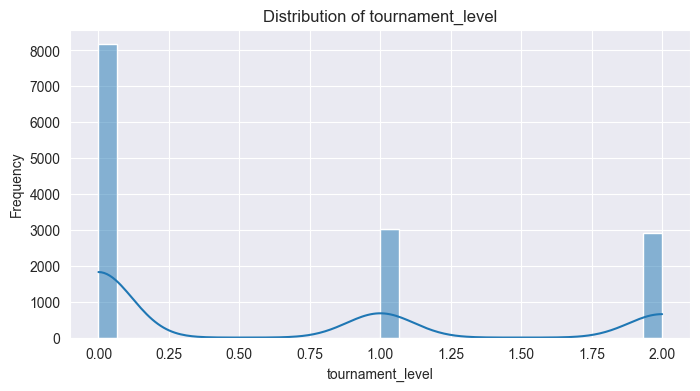

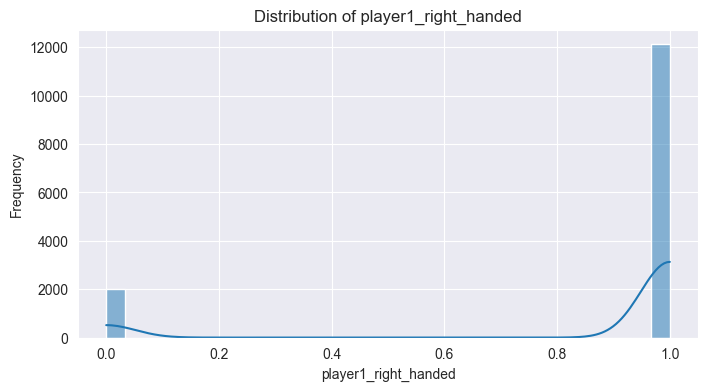

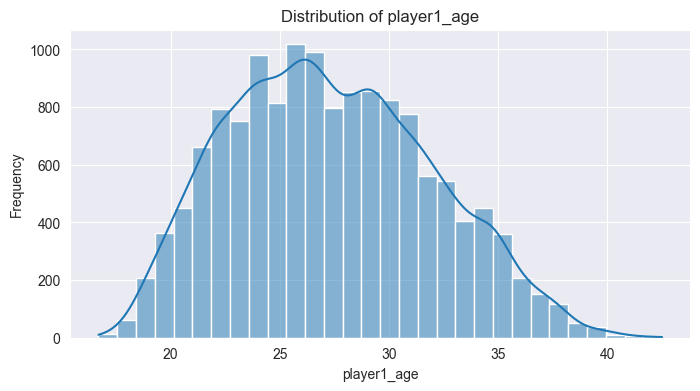

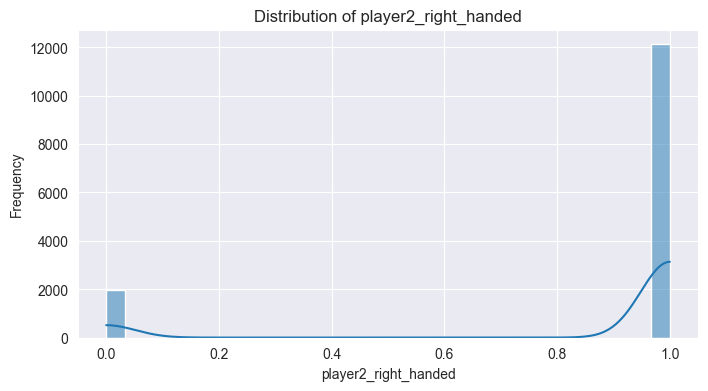

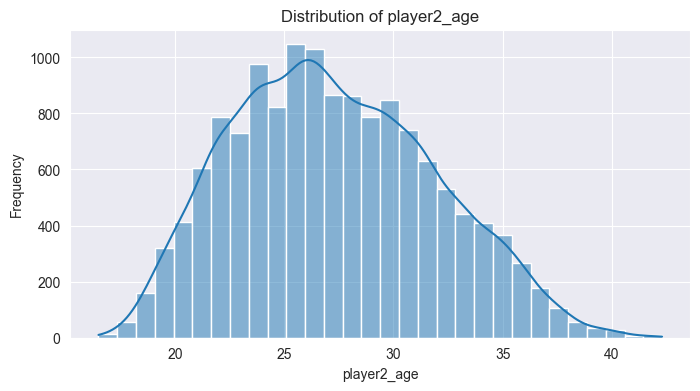

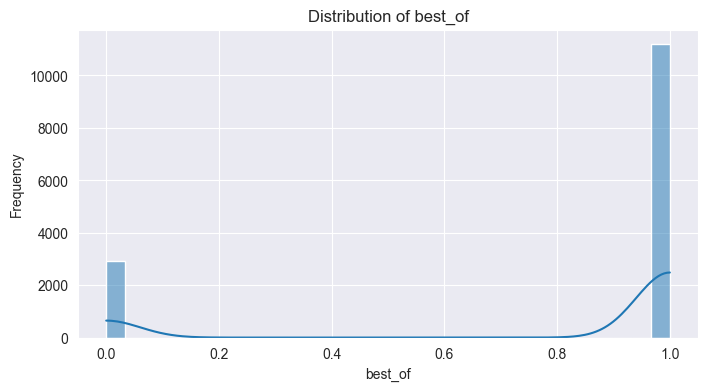

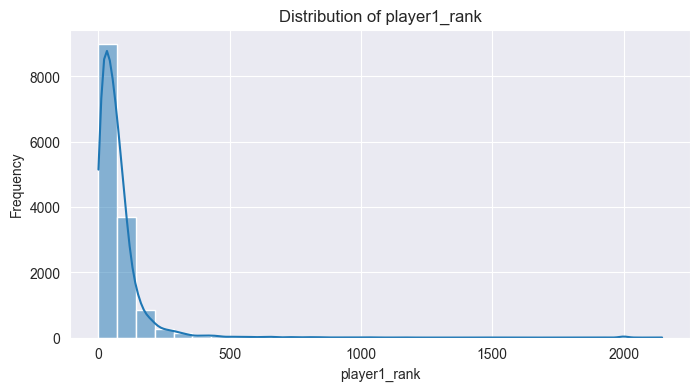

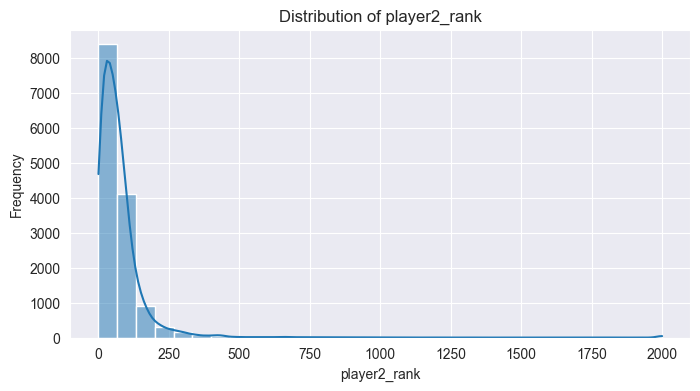

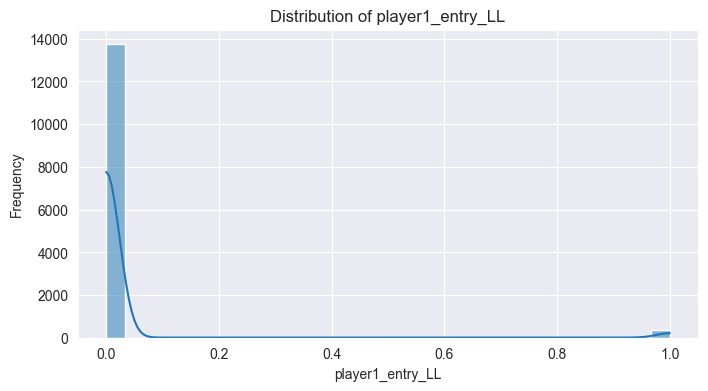

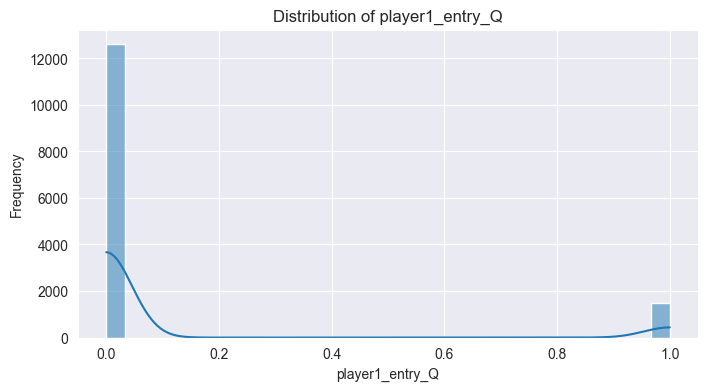

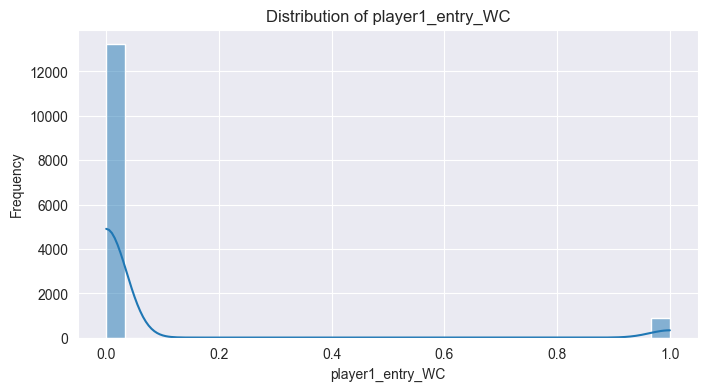

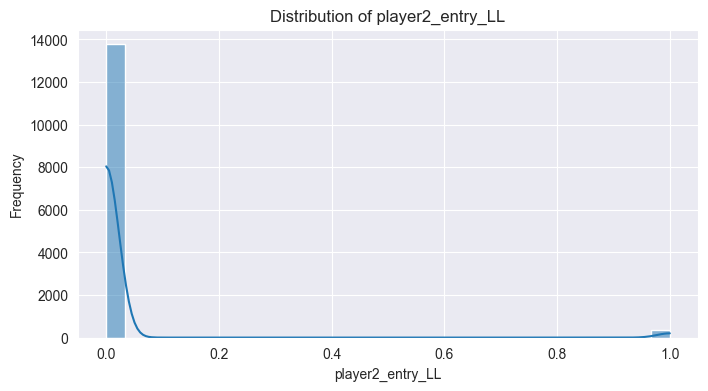

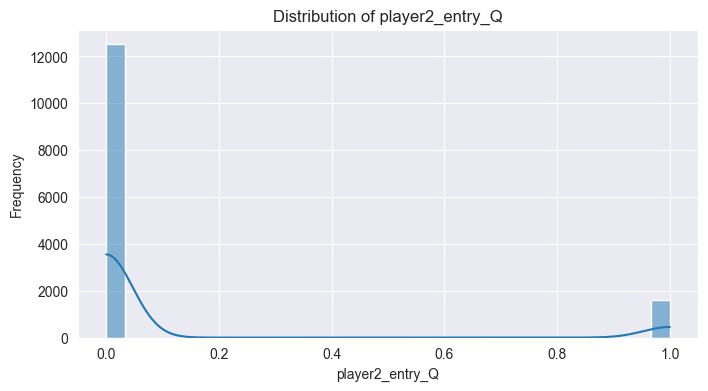

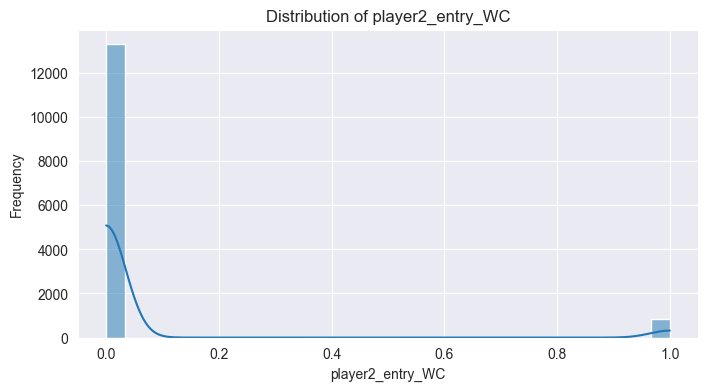

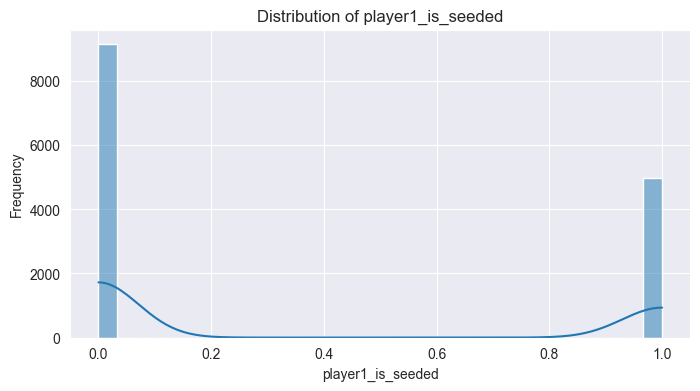

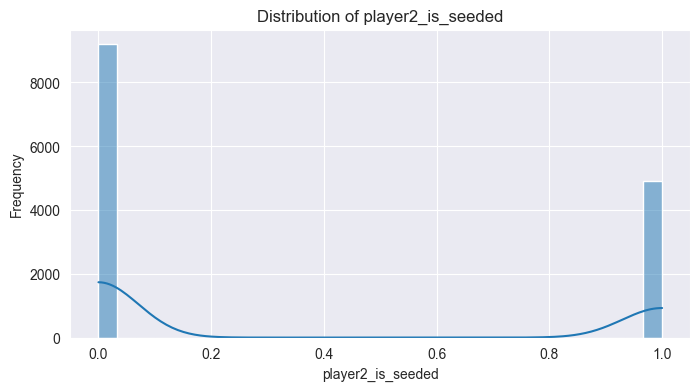

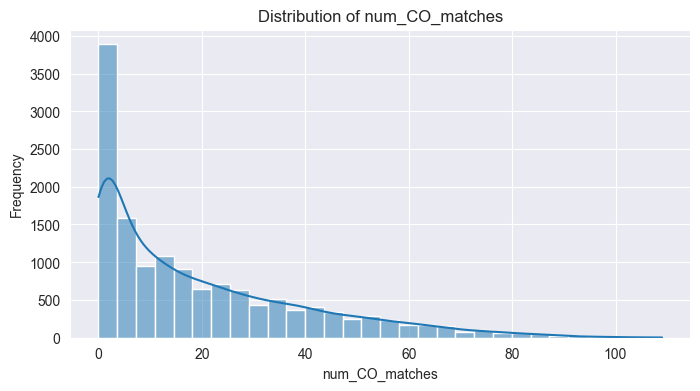

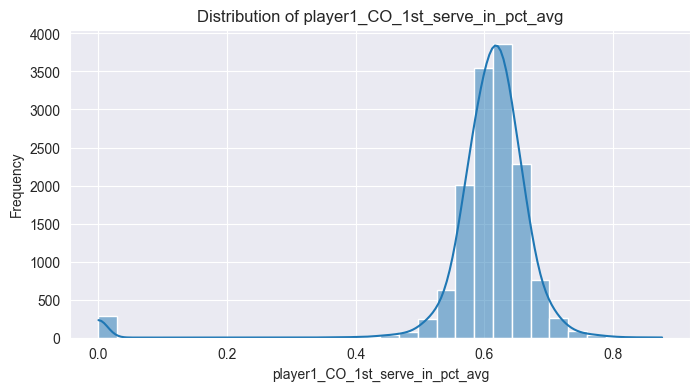

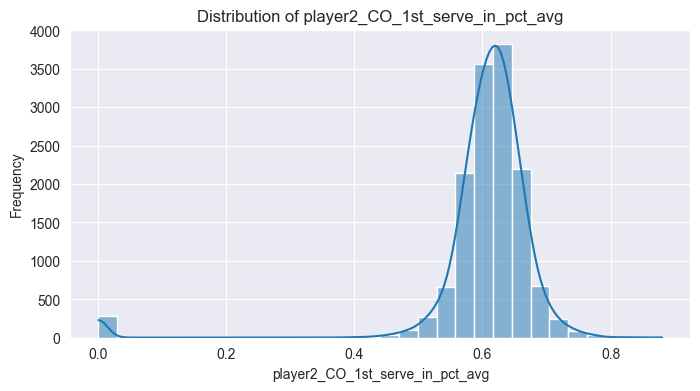

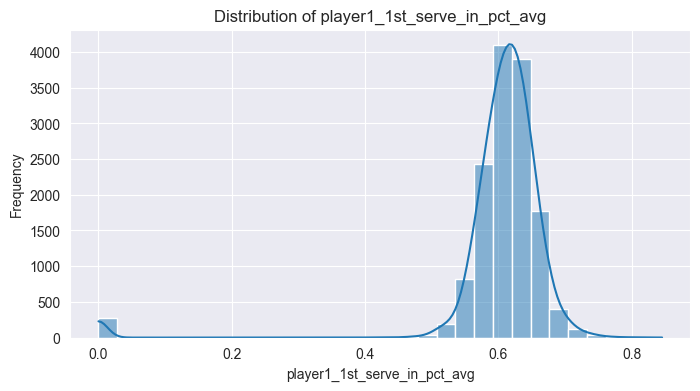

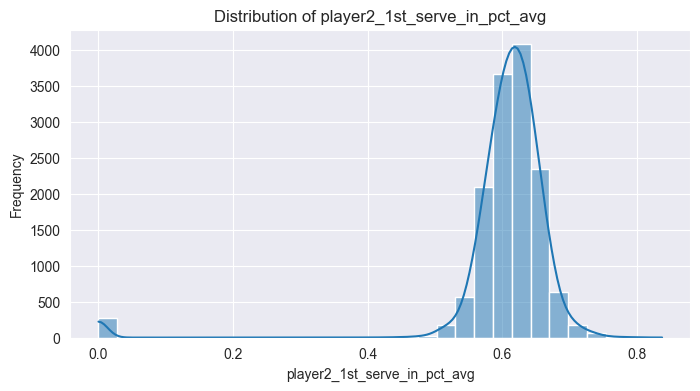

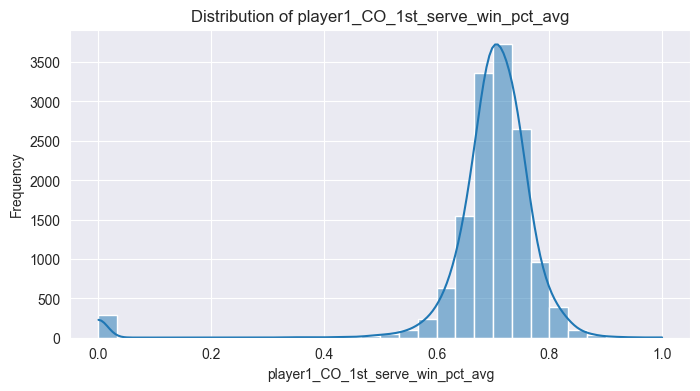

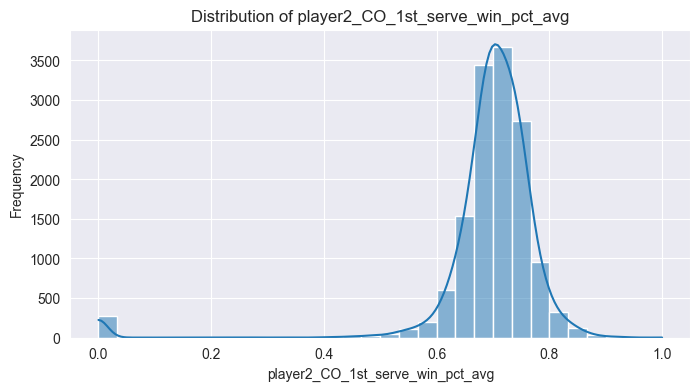

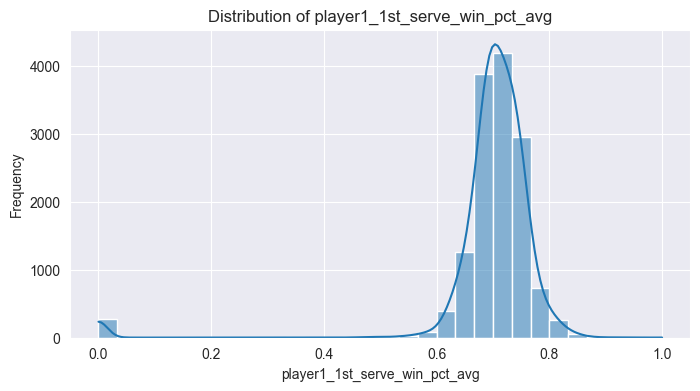

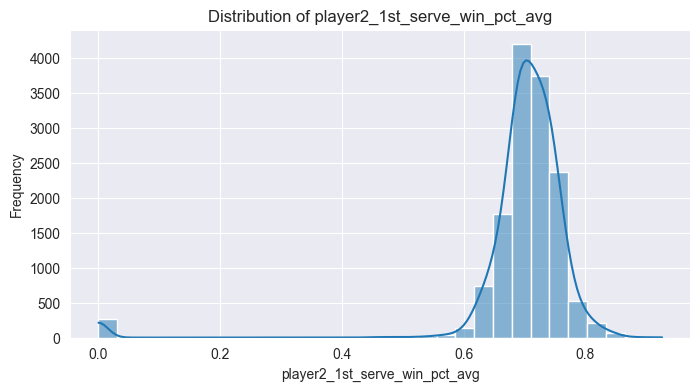

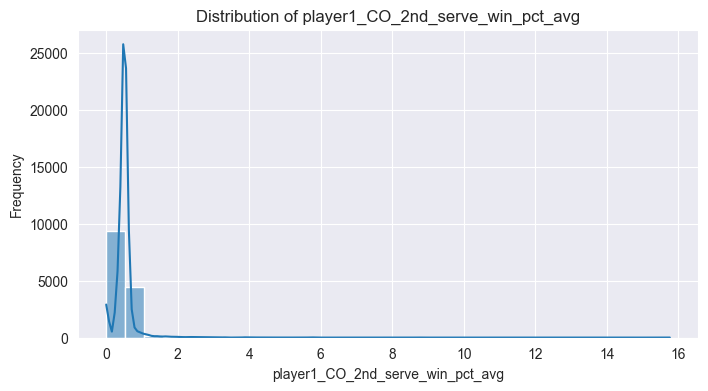

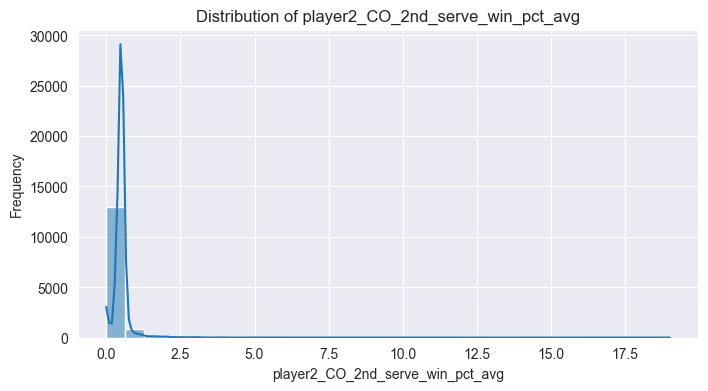

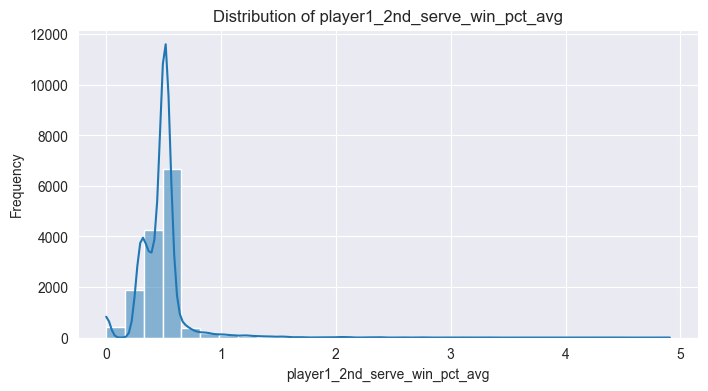

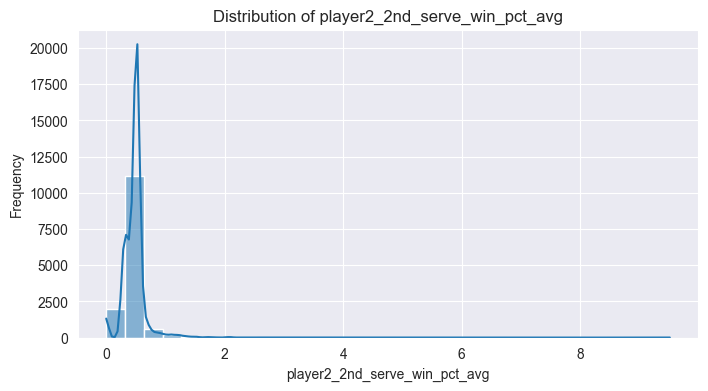

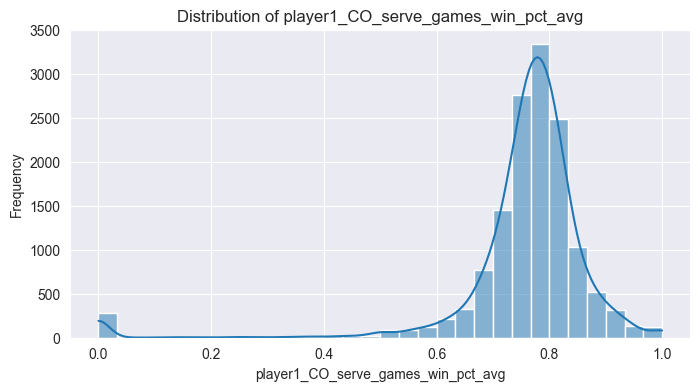

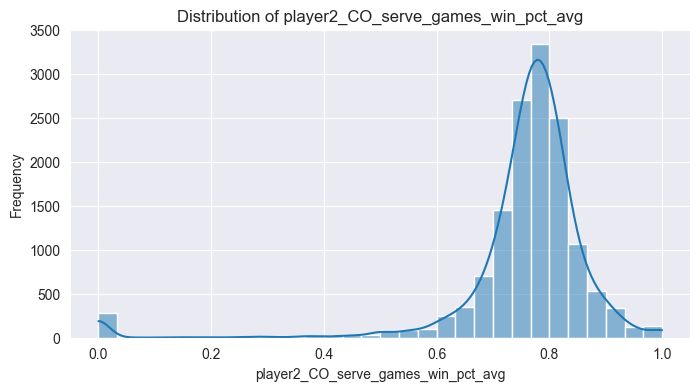

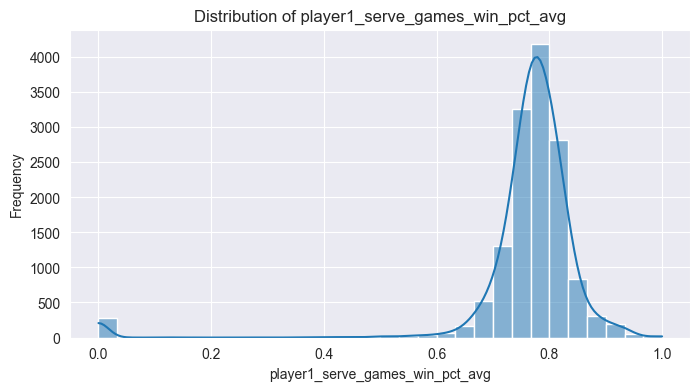

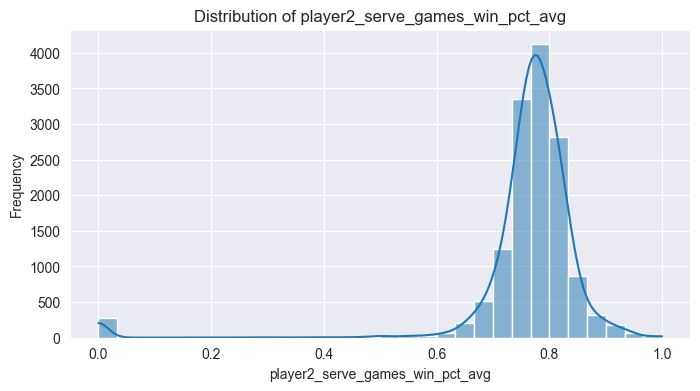

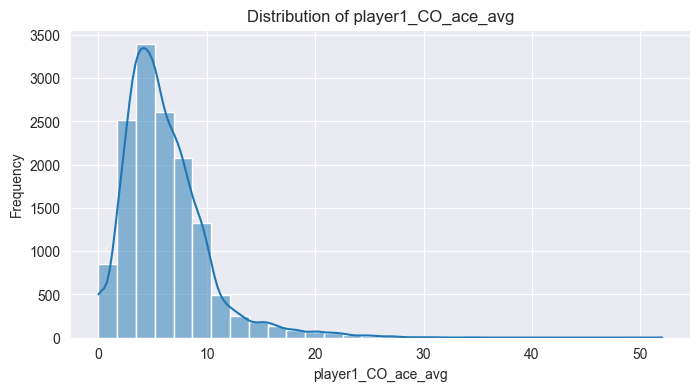

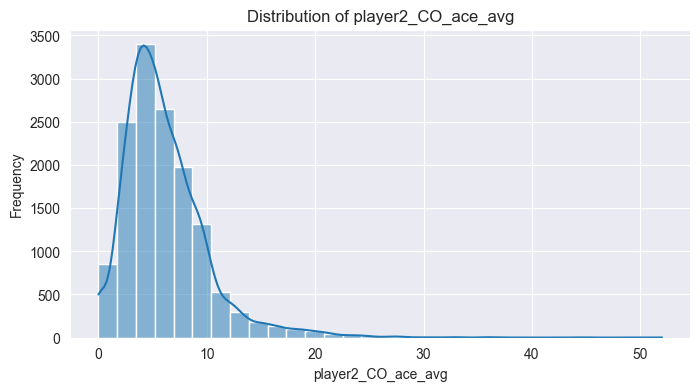

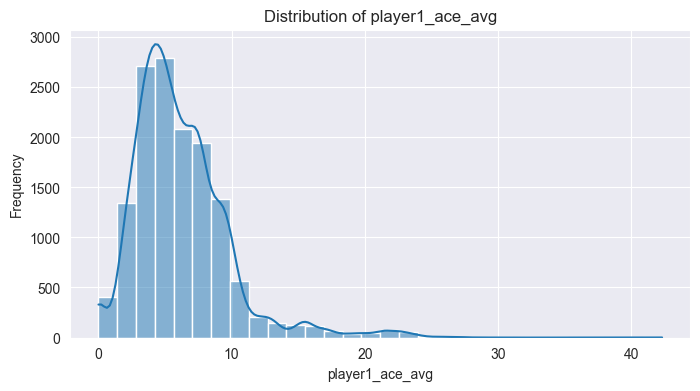

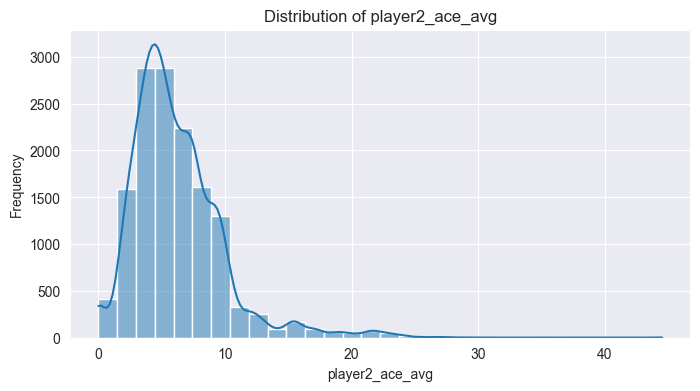

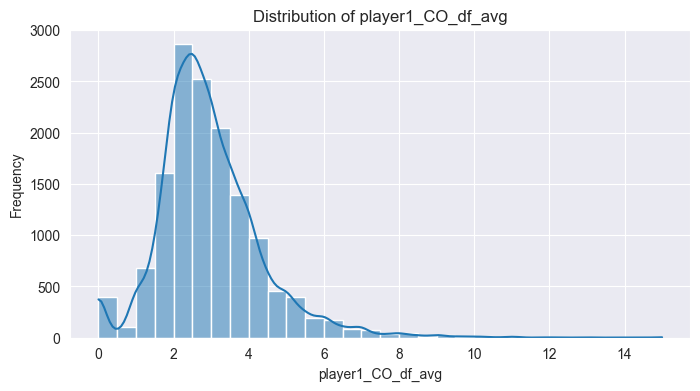

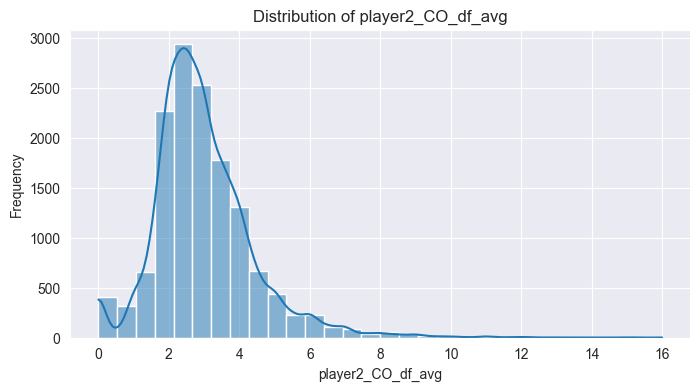

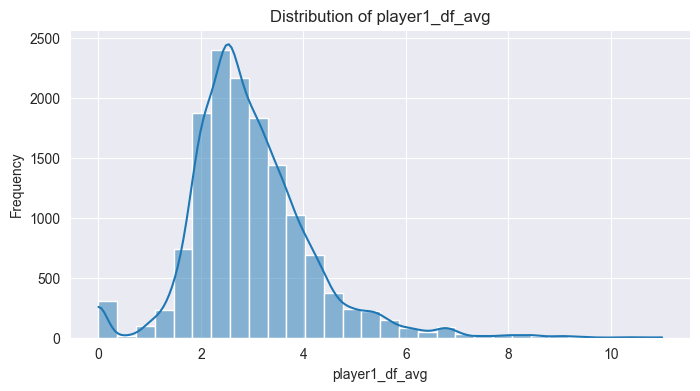

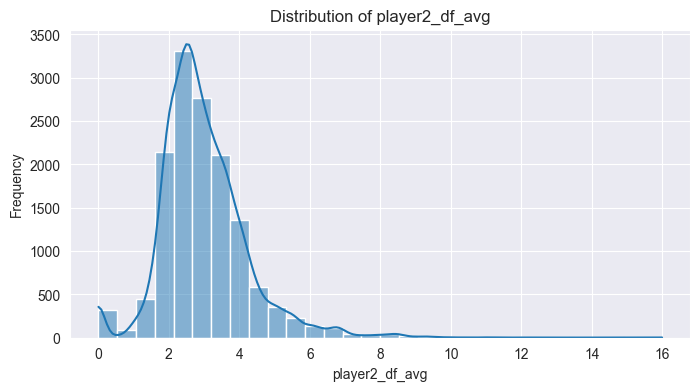

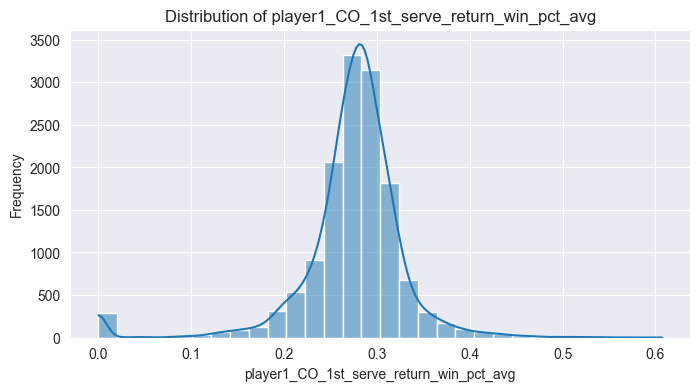

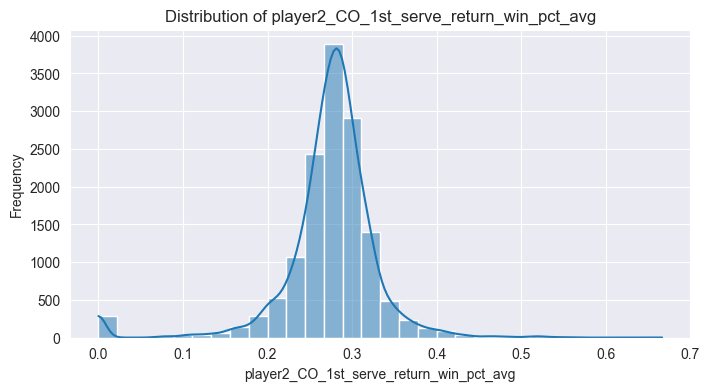

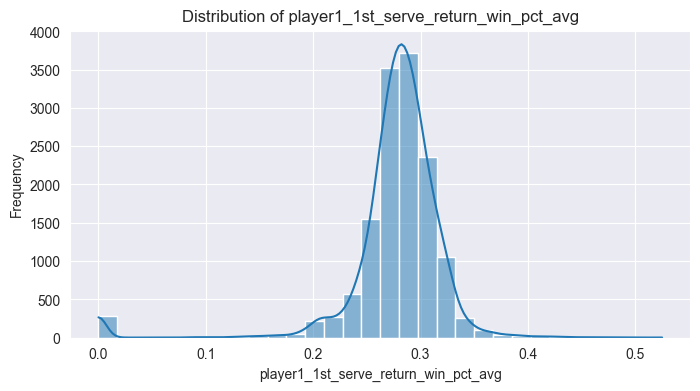

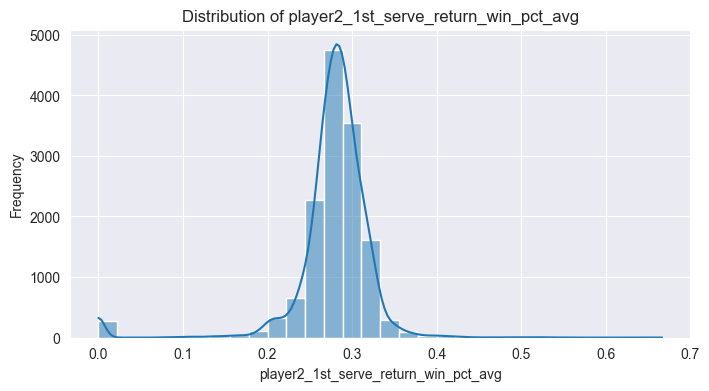

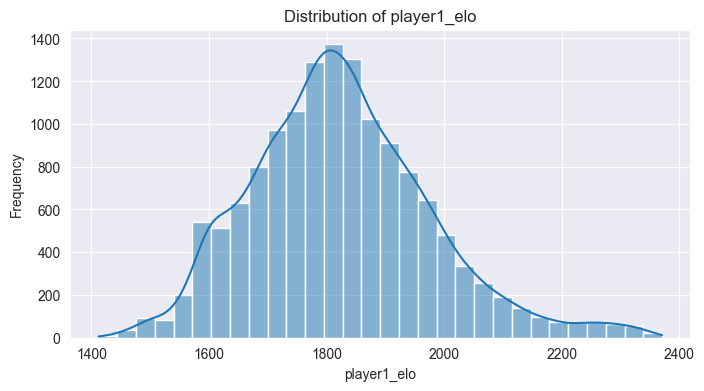

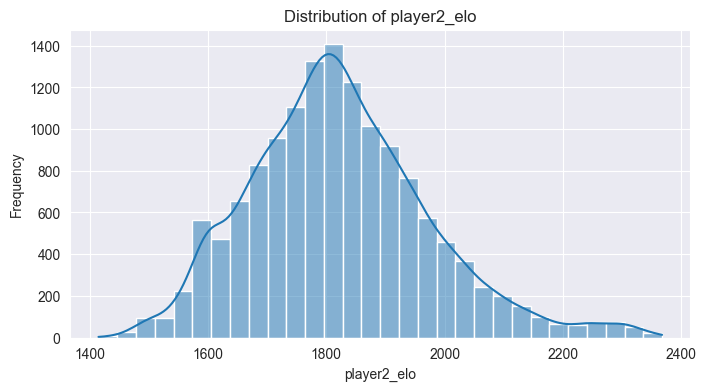

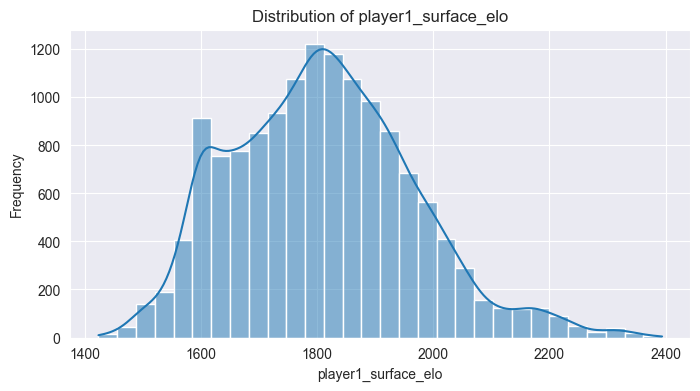

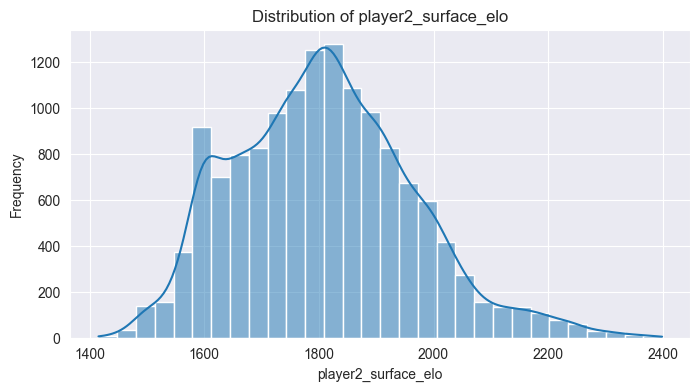

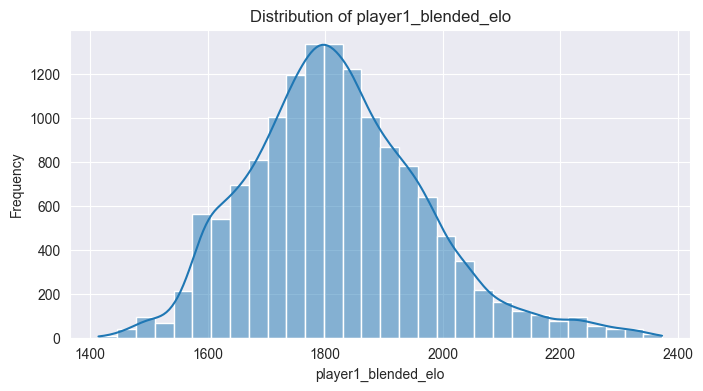

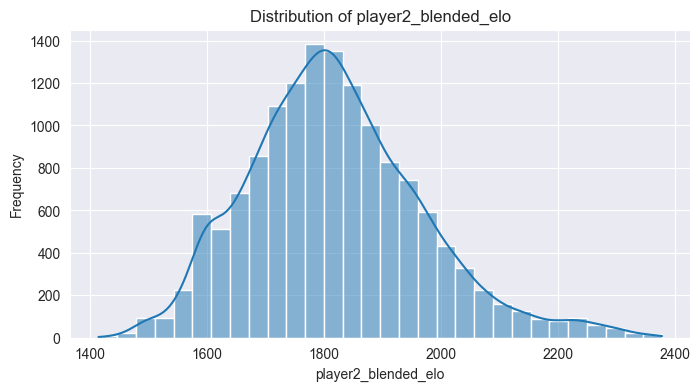

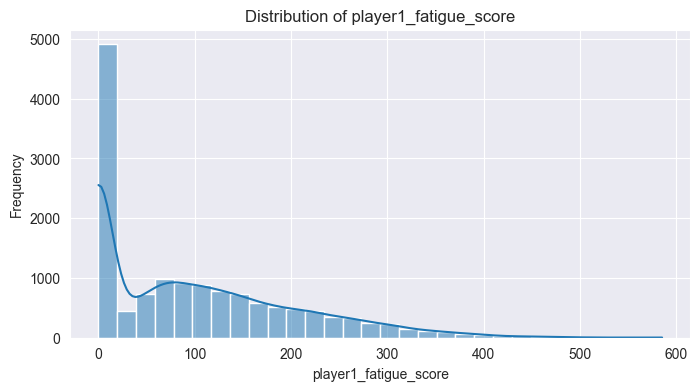

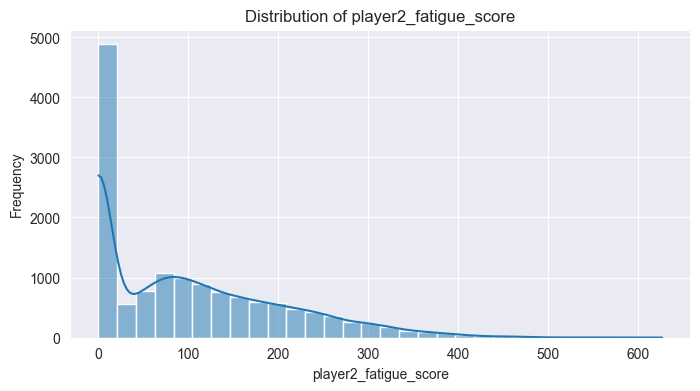

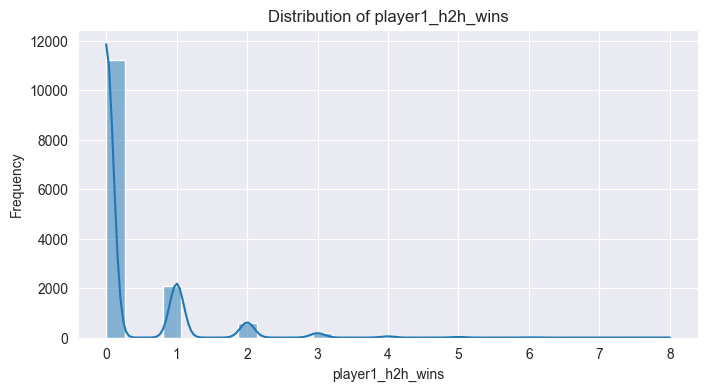

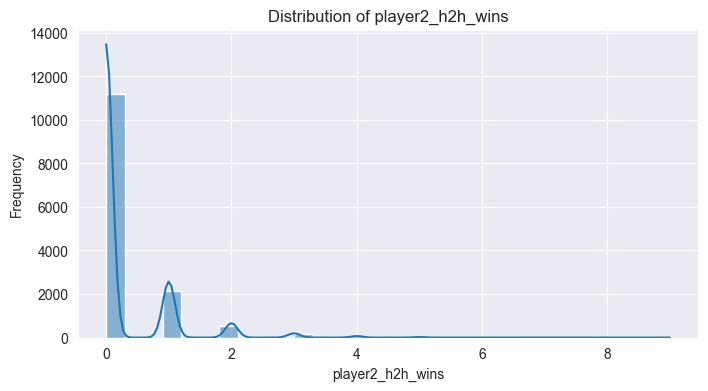

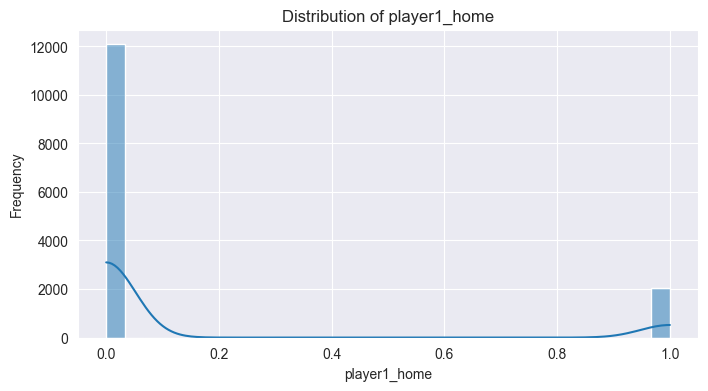

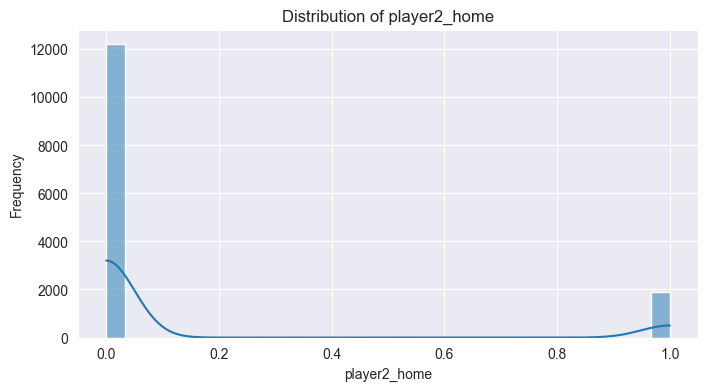

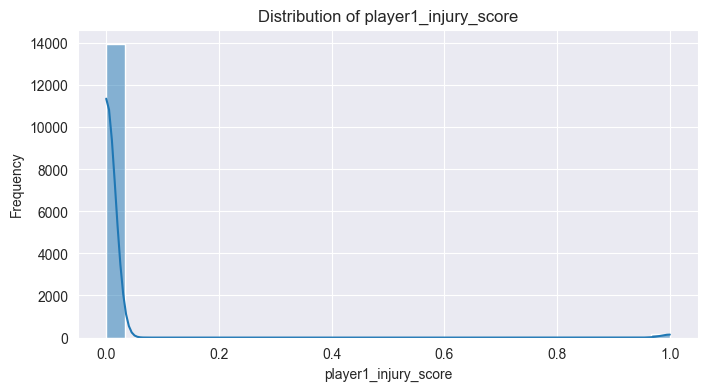

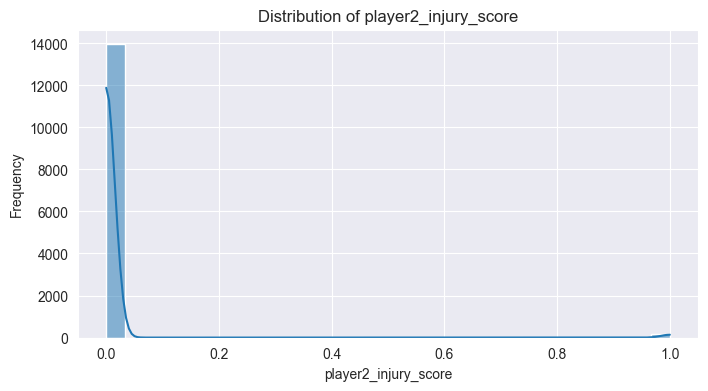

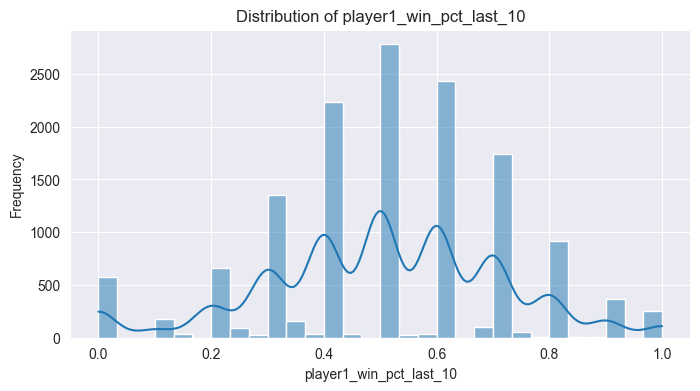

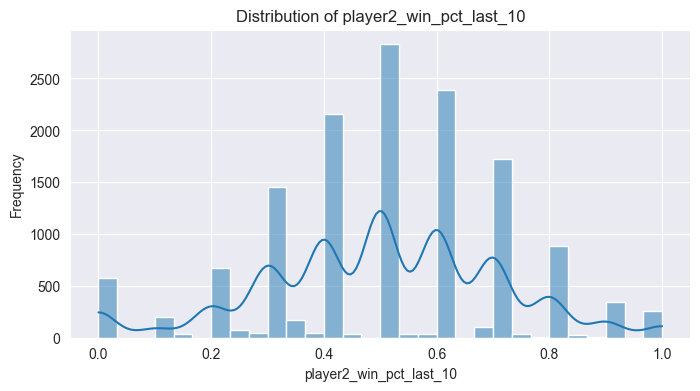

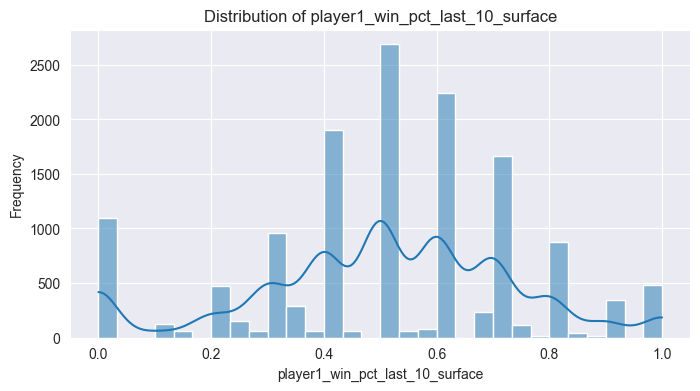

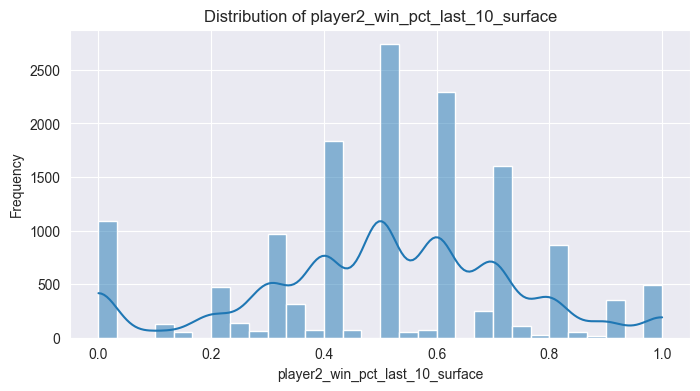

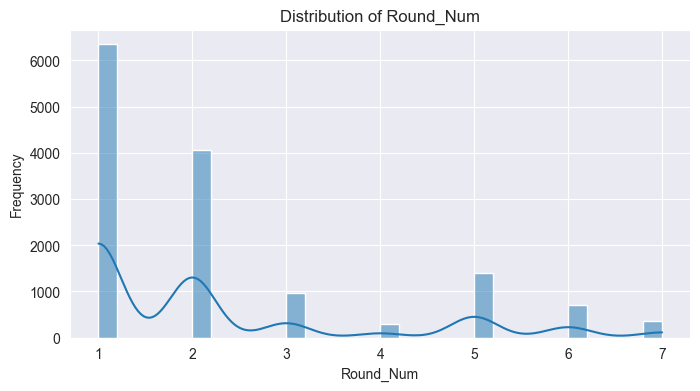

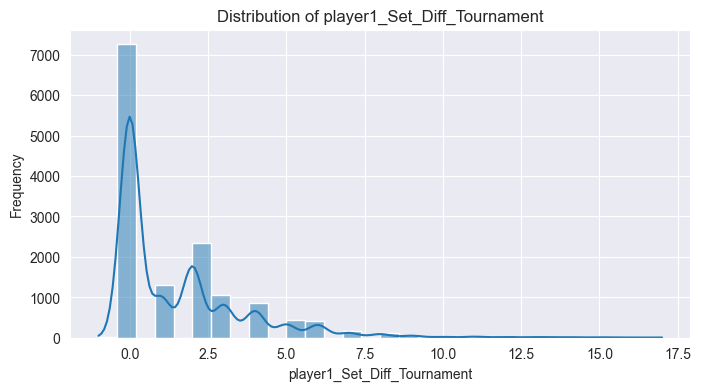

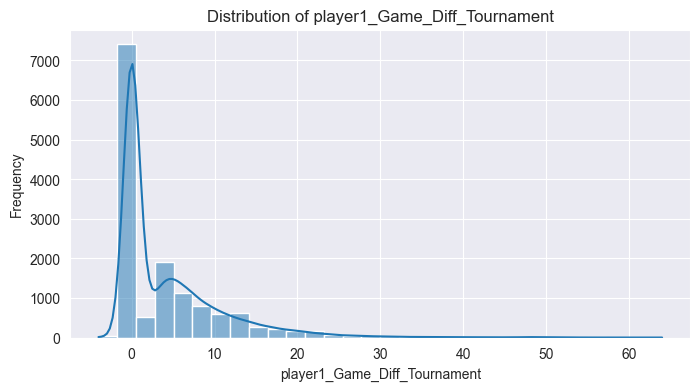

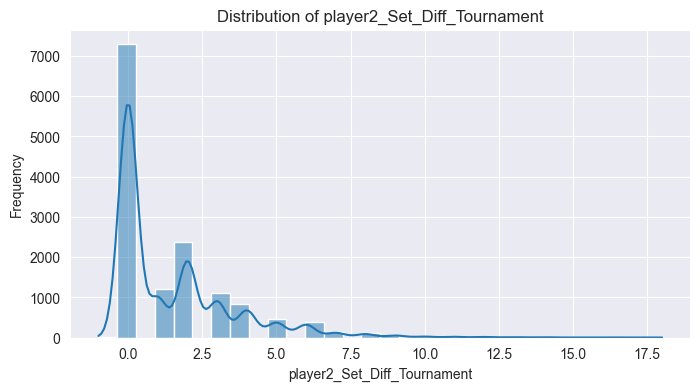

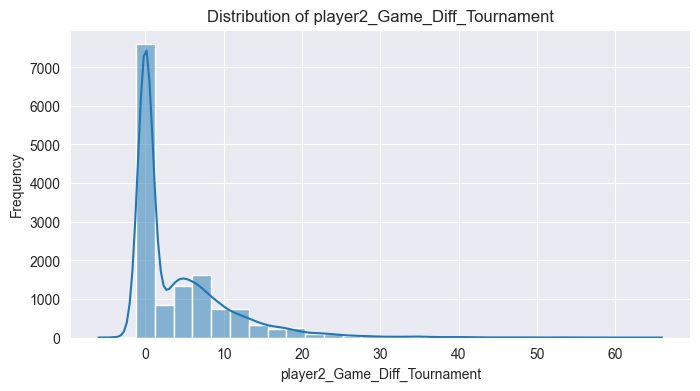

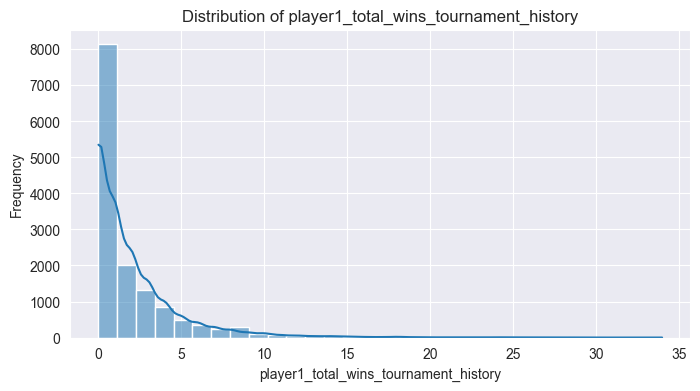

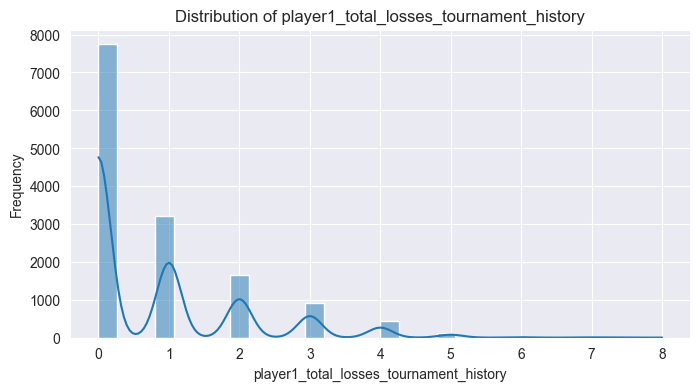

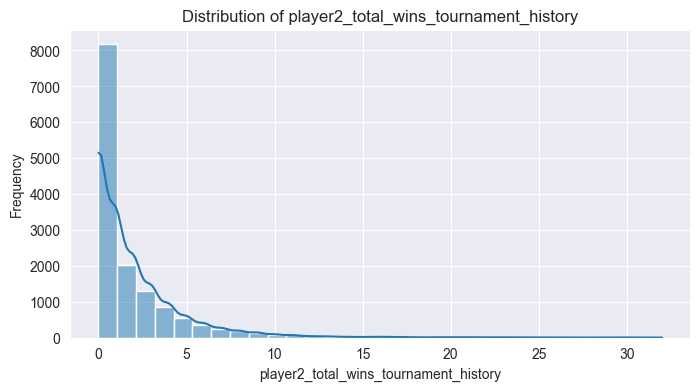

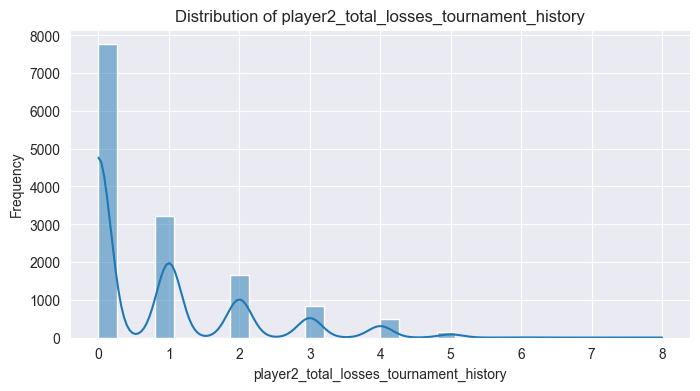

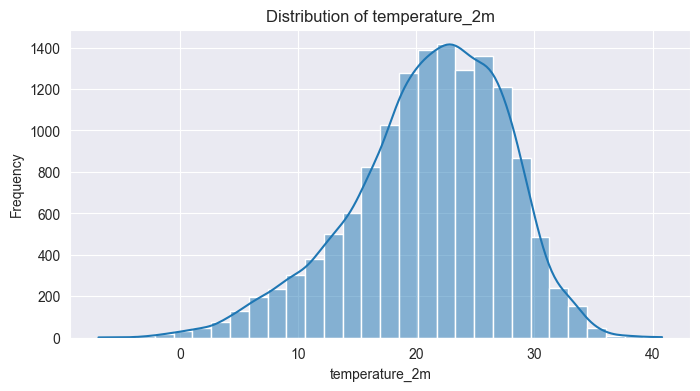

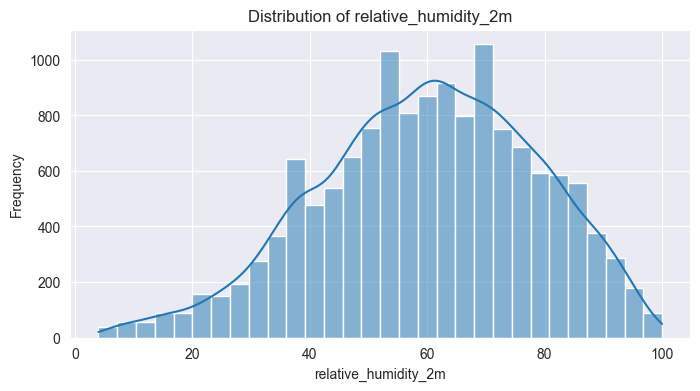

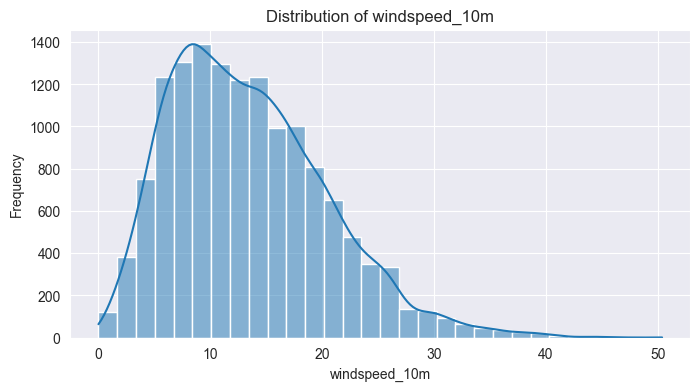

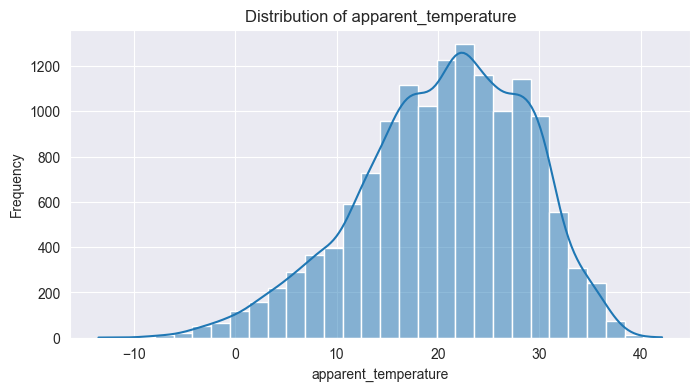

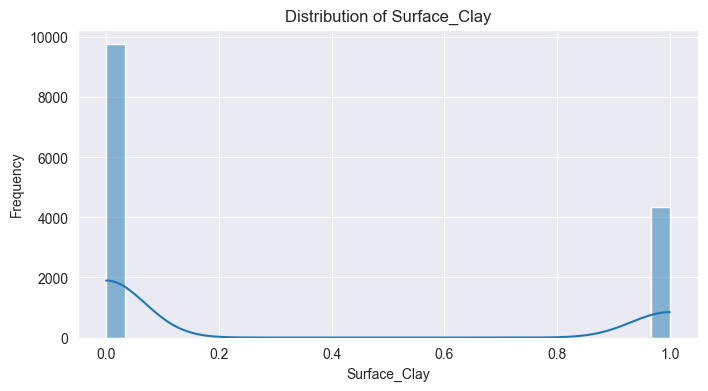

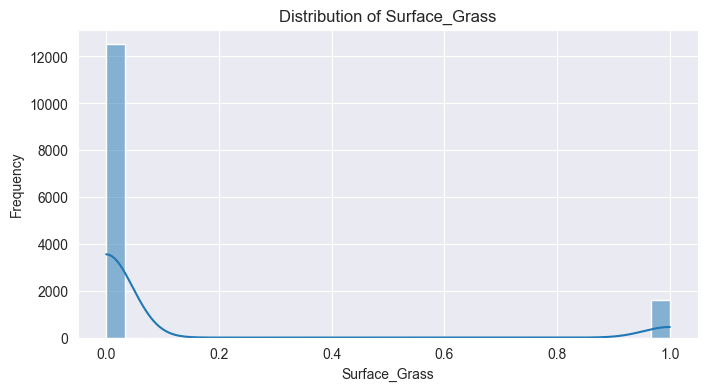

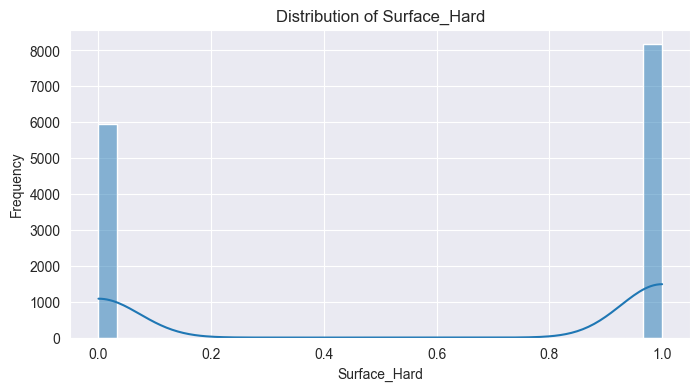

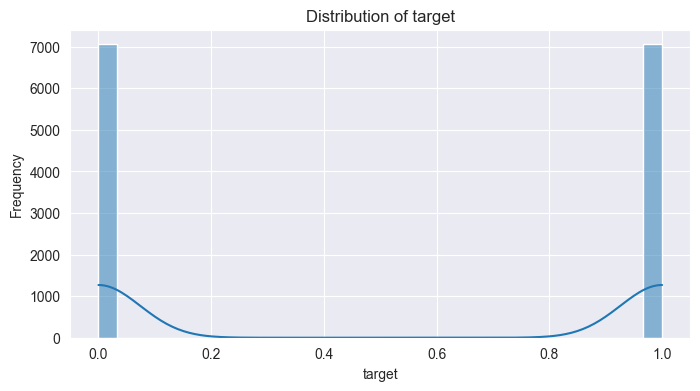

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate through all columns
for col in matches.columns:
    plt.figure(figsize=(8, 4))  # Create a new figure for each plot
    sns.histplot(matches[col], kde=True, bins=30)  # Histogram with KDE overlay
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


### To trzeba będzie gdzieś przenieść i robić opdowiednio do modelu bo tu jest np RandomForestClassifier użyty

100%|===================| 8445/8468 [05:06<00:00]        

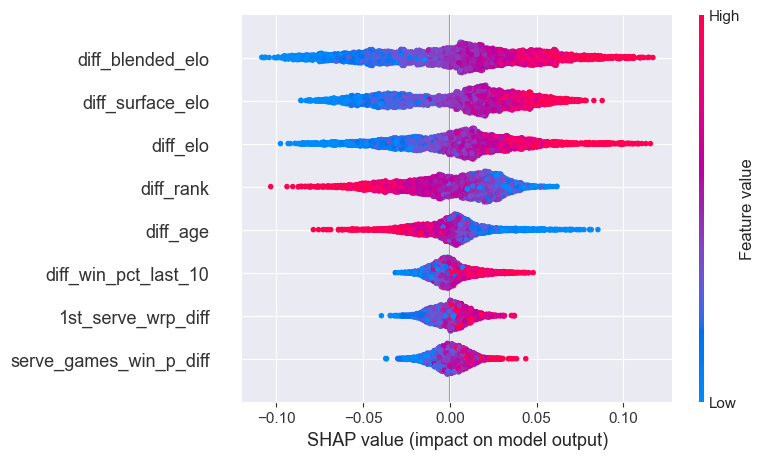

In [38]:
import shap
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Train a model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
X_train_array = X_train.to_numpy()  # Convert X_train to NumPy array for SHAP compatibility
X_test_array = X_test.to_numpy()
# Explain model predictions using SHAP
explainer = shap.Explainer(model, X_train_array)  # Disable additivity check here

# Convert X_test to a NumPy array (optional) and process only the first 5 rows
shap_values = explainer(X_test_array, check_additivity=False)  # Slice directly from DataFrame for SHAP compatibility
shap_values_class_1 = shap_values[..., 1]


# Visualize feature importance
shap.summary_plot(shap_values_class_1, X_test_array, feature_names=X_test.columns, max_display=8, show=False)  # Pass the corresponding subset of X_test
plt.savefig("shap_summary_plot.png", dpi=300, bbox_inches="tight")
plt.show()

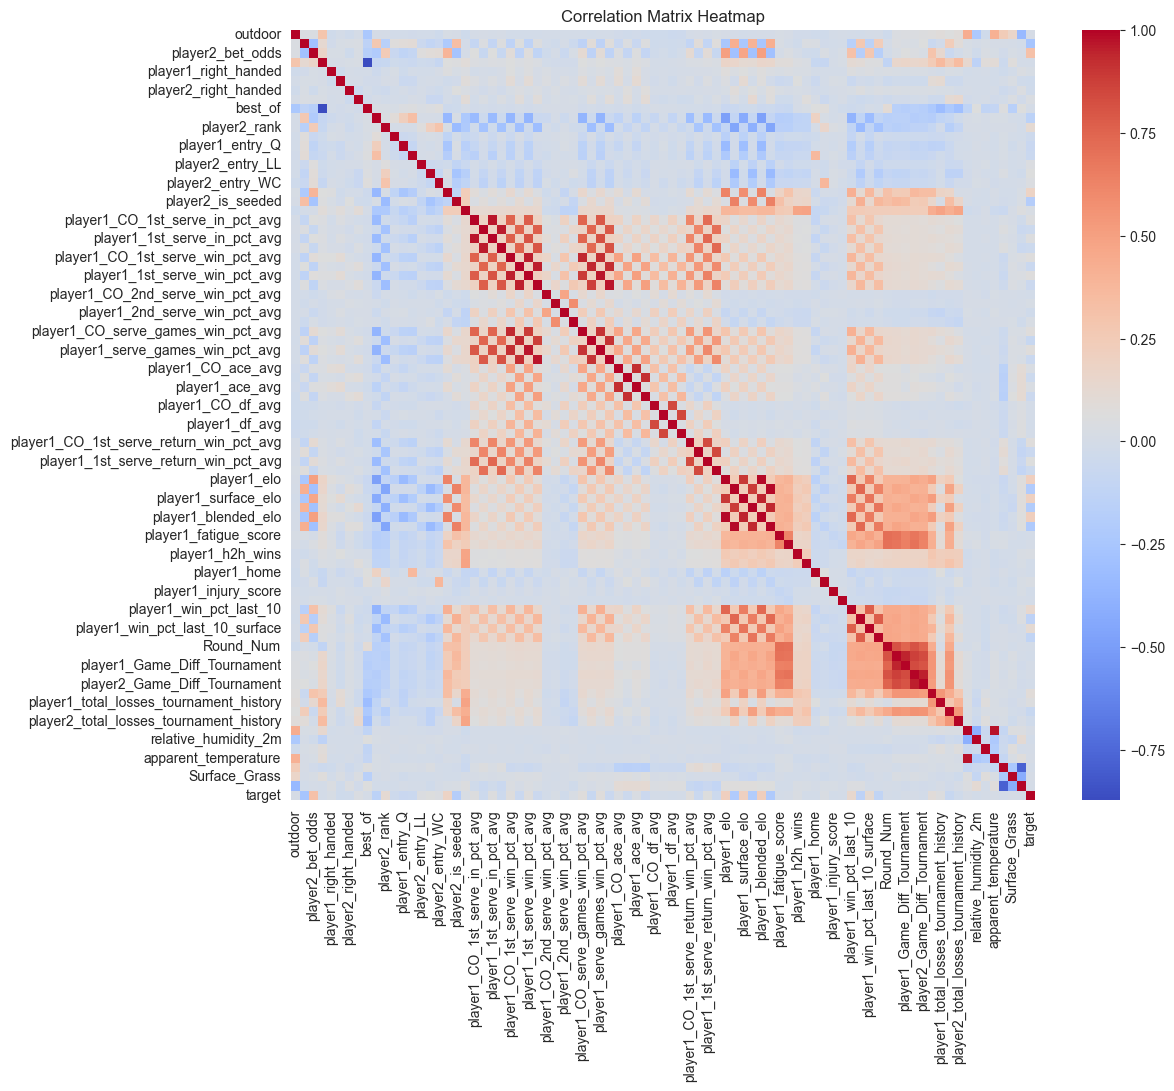

Top Correlated Features:
                          Feature 1                        Feature 2  \
83              player2_blended_elo                      player2_elo   
84                      player2_elo              player2_blended_elo   
85                      player1_elo              player1_blended_elo   
86              player1_blended_elo                      player1_elo   
87             apparent_temperature                   temperature_2m   
88                   temperature_2m             apparent_temperature   
89  player1_serve_games_win_pct_avg    player1_1st_serve_win_pct_avg   
90    player1_1st_serve_win_pct_avg  player1_serve_games_win_pct_avg   
91    player2_1st_serve_win_pct_avg  player2_serve_games_win_pct_avg   
92  player2_serve_games_win_pct_avg    player2_1st_serve_win_pct_avg   

    correlation  
83     0.990188  
84     0.990188  
85     0.990128  
86     0.990128  
87     0.971948  
88     0.971948  
89     0.968251  
90     0.968251  
91     0.967123  
92

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = matches.corr()

# Plot the heatmap without numbers
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', cbar=True, annot=False)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Extract the top correlated features
# Flatten the correlation matrix, and sort by absolute correlation (ignoring self-correlation)
correlation_pairs = (
    correlation_matrix.abs()
    .unstack()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={0: "correlation", "level_0": "Feature 1", "level_1": "Feature 2"})
)

# Remove self-correlations
top_correlations = correlation_pairs[correlation_pairs["Feature 1"] != correlation_pairs["Feature 2"]]

# Print the top correlated features with their values
print("Top Correlated Features:")
print(top_correlations.head(10))
